Name: Nitish Dhinaharan

Course: MSCS-634 Advanced Big Data and Data Mining

Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

In [14]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Step 1: Data Collection

In [4]:
# Load dataset
df = pd.read_csv("global_air_quality.csv")

# Display first five rows
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [12]:
pollutant_cols = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]

# sometimes a few rows will have NaN for some pollutants → fill with median first
for c in pollutant_cols:
    df[c] = df[c].fillna(df[c].median())

# simple composite AQI
df["AQI"] = (
    df["PM2.5"]*0.35 +
    df["PM10"]*0.25 +
    df["NO2"]*0.15 +
    df["SO2"]*0.10 +
    df["CO"]*0.10 +
    df["O3"]*0.05
)

df[["City","Country","AQI"]].head()

,City,Country,AQI
0,Bangkok,Thailand,56.9025
1,Istanbul,Turkey,57.7080
2,Rio de Janeiro,Brazil,84.6245
3,Mumbai,India,82.1785
4,Paris,France,45.7420


Step 2: Data Visualization

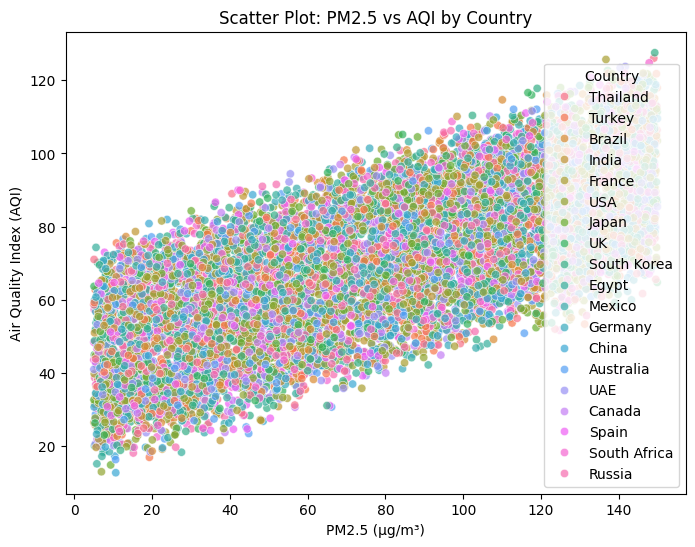

In [13]:
# Scatter Plot: PM2.5 vs AQI
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="PM2.5", y="AQI", hue="Country", alpha=0.7)
plt.title("Scatter Plot: PM2.5 vs AQI by Country")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Air Quality Index (AQI)")
plt.show()

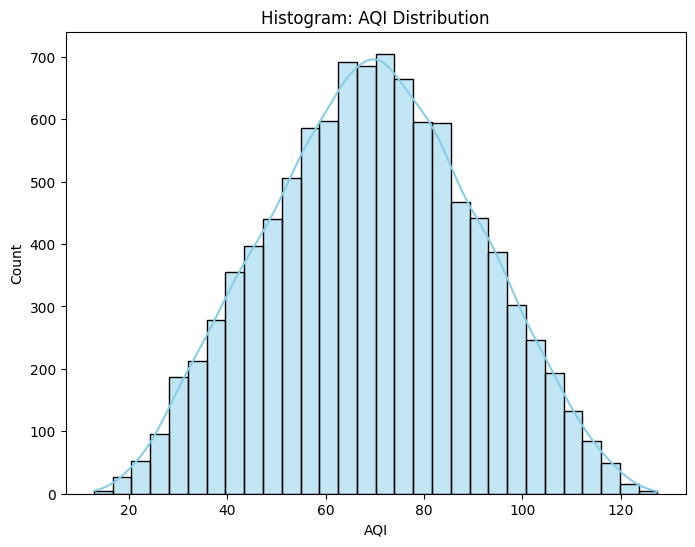

In [15]:
# Histogram: Distribution of AQI
plt.figure(figsize=(8,6))
sns.histplot(df["AQI"], bins=30, kde=True, color="skyblue")
plt.title("Histogram: AQI Distribution")
plt.xlabel("AQI")
plt.show()

Step 3: Data Preprocessing

In [21]:
# 1) Handling missing values

# Check for missing values before
print(df.isnull().sum())

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
AQI            0
dtype: int64


In [22]:
# Fill missing values of pollutant & AQI columns with median
cols = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "AQI"]
for c in cols:
    df[c] = df[c].fillna(df[c].median())

# verify no missing values after
print(df.isnull().sum())

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
AQI            0
dtype: int64


In [27]:
# 2) Outlier Detection and Removal

# Example for PM2.5
Q1 = df["PM2.5"].quantile(0.25)
Q3 = df["PM2.5"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("IQR:", IQR)

print("Before removing outliers:", df.shape)

outliers = df[(df["PM2.5"] < lower) | (df["PM2.5"] > upper)]
print("Outliers count:", outliers.shape[0])

df_no_outliers = df[(df["PM2.5"] >= lower) & (df["PM2.5"] <= upper)]
print("After removing outliers:", df_no_outliers.shape)

IQR: 72.2075
Before removing outliers: (10000, 13)
Outliers count: 0
After removing outliers: (10000, 13)


In [30]:
# 3) Data Reduction
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,AQI
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,56.9025
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,57.7080
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,84.6245
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,82.1785
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,45.7420


In [31]:
# Sampling (e.g., 20%)
df_sample = df_no_outliers.sample(n=int(0.2 * len(df_no_outliers)), random_state=42)

# Dropping columns less relevant (e.g., “Date”)
df_reduced = df_sample.drop(["Date"], axis=1)  # adjust column list as needed
df_reduced.head()

,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,AQI
6252,Beijing,China,111.92,32.08,7.95,37.45,9.43,45.77,23.68,30.31,5.91,55.3610
4684,Berlin,Germany,62.62,153.88,22.76,22.12,0.45,112.53,1.93,66.61,1.22,71.6845
1731,Bangkok,Thailand,77.06,114.31,24.99,45.80,8.55,64.48,-1.39,27.47,6.25,67.9560
4742,Istanbul,Turkey,72.75,38.79,31.58,35.59,2.63,186.67,16.51,28.25,16.90,53.0525
4521,Sydney,Australia,18.25,186.45,27.36,45.47,8.91,170.28,-0.68,90.85,5.72,71.0560


In [37]:
# 4) Data Scaling and Discretization

scaler = MinMaxScaler()
num_cols = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "AQI"]
df_reduced[num_cols] = scaler.fit_transform(df_reduced[num_cols])

# Discretize AQI into categories
df_reduced["AQI_Category"] = pd.cut(
    df_reduced["AQI"],
    bins=[0, 0.3, 0.6, 0.8, 1.0],
    labels=["Good", "Moderate", "Unhealthy", "Hazardous"]
)
df_reduced.head()

,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,AQI,AQI_Category
6252,Beijing,China,0.737390,0.115983,0.030983,0.744181,0.942424,0.187997,23.68,30.31,5.91,0.369557,Moderate
4684,Berlin,Germany,0.397226,0.757812,0.187059,0.431196,0.035354,0.539754,1.93,66.61,1.22,0.512216,Moderate
1731,Bangkok,Thailand,0.496861,0.549297,0.210560,0.914659,0.853535,0.286580,-1.39,27.47,6.25,0.479630,Moderate
4742,Istanbul,Turkey,0.467122,0.151341,0.280008,0.706207,0.255556,0.930397,16.51,28.25,16.90,0.349382,Moderate
4521,Sydney,Australia,0.091078,0.929441,0.235536,0.907922,0.889899,0.844038,-0.68,90.85,5.72,0.506723,Moderate


Step 4: Statistical Analysis

In [39]:
# General overview
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   City          2000 non-null   object  
 1   Country       2000 non-null   object  
 2   PM2.5         2000 non-null   float64 
 3   PM10          2000 non-null   float64 
 4   NO2           2000 non-null   float64 
 5   SO2           2000 non-null   float64 
 6   CO            2000 non-null   float64 
 7   O3            2000 non-null   float64 
 8   Temperature   2000 non-null   float64 
 9   Humidity      2000 non-null   float64 
 10  Wind Speed    2000 non-null   float64 
 11  AQI           2000 non-null   float64 
 12  AQI_Category  1999 non-null   category
dtypes: category(1), float64(10), object(2)
memory usage: 205.3+ KB


In [40]:
df_reduced.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,AQI
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.501342,0.503600,0.491887,0.494081,0.507387,0.508792,14.43329,55.030790,10.205715,0.495096
std,0.288942,0.293132,0.285086,0.287523,0.286817,0.291054,14.50690,26.102797,5.633121,0.180474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.97000,10.010000,0.500000,0.000000
25%,0.254675,0.253557,0.245732,0.239026,0.263384,0.246733,1.42750,32.827500,5.237500,0.366880
50%,0.501069,0.503452,0.481768,0.488975,0.508081,0.518125,14.43500,54.990000,10.290000,0.497188
75%,0.746447,0.756626,0.736379,0.751837,0.760859,0.762264,27.11250,77.675000,14.900000,0.623202
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.97000,99.970000,19.990000,1.000000


In [44]:
# Central Tendency Measures
mean_pm25 = df_reduced["PM2.5"].mean()
median_pm25 = df_reduced["PM2.5"].median()
mode_pm25 = df_reduced["PM2.5"].mode()[0]
min_pm25 = df_reduced["PM2.5"].min()
max_pm25 = df_reduced["PM2.5"].max()

print("PM2.5 – \n Min:", min_pm25,
      "\n Max:", max_pm25,
      "\n Mean:", mean_pm25,
      "\n Median:", median_pm25,
      "\n Mode:", mode_pm25)

PM2.5 – 
 Min: 0.0 
 Max: 1.0 
 Mean: 0.5013420961843649 
 Median: 0.5010694818188091 
 Mode: 0.9833022838611745


In [47]:
# Dispersion Measures
range_pm25 = max_pm25 - min_pm25
variance_pm25 = df_reduced["PM2.5"].var()
std_pm25 = df_reduced["PM2.5"].std()
Q1_pm25, Q3_pm25 = df_reduced["PM2.5"].quantile([0.25, 0.75])
IQR_pm25 = Q3_pm25 - Q1_pm25

print(" Range:", range_pm25,
      "\n Variance:", variance_pm25,
      "\n StdDev:", std_pm25,
      "\n IQR:", IQR_pm25)

 Range: 1.0 
 Variance: 0.08348766571104879 
 StdDev: 0.2889423224642745 
 IQR: 0.4917718898778721


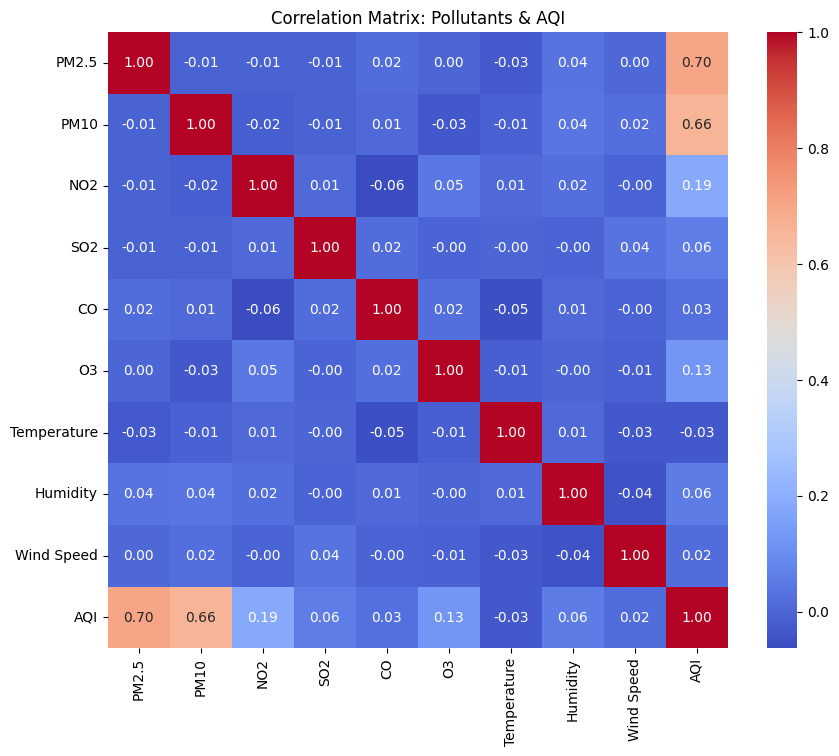

In [48]:
# Correction Analysis
corr_matrix = df_reduced.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Pollutants & AQI")
plt.show()